In [1]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

from hyperfit.linfit import LinFit
import functions
import old_relations
import new_relations
from ltsfit import lts_planefit

In [3]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
paras=['tan_phi','log_v_max']
paras.append('M_BH')
stds=[]
for para in paras:
    stds.append(para+'_std')
    
paras.append('bri25')
    
df_=df[paras+stds].dropna(axis='index',how='any')
paras=paras[:-1]
df_=df_[paras+stds]
    
print(len(df_))

41


In [4]:
np.median((df_['tan_phi']))
# 0.238

0.238233604

In [5]:
np.median(10**df_['log_v_max'])
# 211

210.9999998553674

In [6]:
normalization=np.array([np.median((df_['tan_phi'])),np.median(10**df_['log_v_max'])])

In [7]:
normalization

array([  0.2382336 , 210.99999986])

In [8]:
normalization[1]=np.log10(normalization[1])
    
xs=np.array(df_[paras]).transpose()
errs=np.array(df_[stds]).transpose()
cov=np.zeros((len(paras),len(paras),len(df_)))

for i in range(len(normalization)):
    xs[i]=xs[i]-normalization[i]
    
for i in range(len(paras)):
    cov[i,i,:]=errs[i]**2

In [9]:
normalization

array([0.2382336 , 2.32428246])

In [10]:
a = -5.652461023426235
b = 4.
c = -0.5040713045375144
c+a*0.2382336+b*2.32428246

7.44645239699197

In [91]:
bounds = ((-5.7, -5.6),(3.9, 4.1),(7.44,7.45),(1.0e-5, 1.0))

/home/zj448/miniconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


[-5.58189854  3.95991274  7.33367282  0.22035827] [0.05555581 0.05795485 0.05470975 0.06387363]


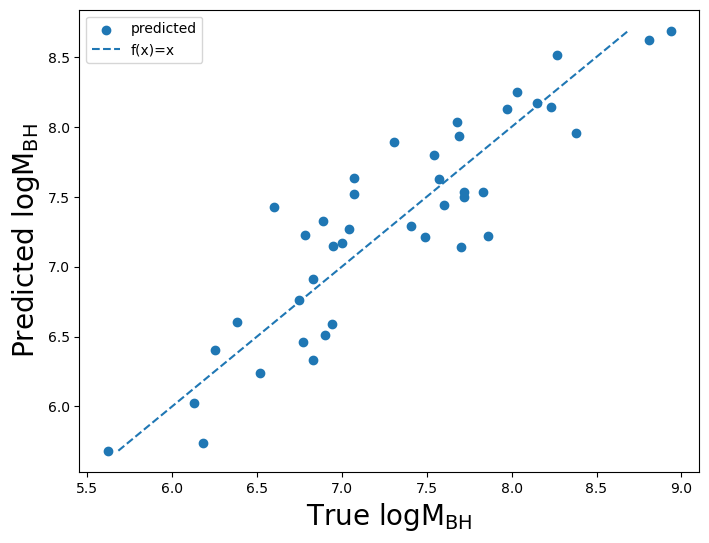

rmse: 0.2327149791319604
un-weight rmse: 0.3397431233822289


(array([-5.58189854,  3.95991274,  7.33367282,  0.22035827]),
 array([0.05555581, 0.05795485, 0.05470975, 0.06387363]))

In [92]:
hf = LinFit(xs, cov)

mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=False)
print(np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1))



c=np.mean(mcmc_samples, axis=1)
y=xs[-1]
y_pred=0
for i in range(len(c)-2):
    y_pred+=c[i]*xs[i]
y_pred+=c[-2]

plt.figure(figsize=(8,6))
plt.scatter(y,y_pred,label='predicted')
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),ls='--',label='f(x)=x')
plt.xlabel(r'True $\rm{log} M_{BH}$',fontsize=20)
plt.ylabel(r'Predicted $\rm{log} M_{BH}$',fontsize=20)
plt.legend()
plt.show()

w = 1/errs[-1]**2
print('rmse:',np.sqrt(np.average((y-y_pred)**2,weights=w)))
print('un-weight rmse:',np.sqrt(np.average((y-y_pred)**2)))
np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1)

In [94]:
xs.shape[1]

41

### The cell above are hyperfit outputs

In [20]:
df_[paras]

,tan_phi,log_v_max,M_BH
96,0.305731,2.184691,6.25
99,0.412170,2.292256,6.52
103,0.149451,2.409933,8.15
104,0.245624,2.292256,7.00
105,0.282971,2.461093,7.57
106,0.311465,2.283301,6.75
107,0.167343,2.382017,8.38
108,0.225360,2.276462,7.86
109,0.350195,2.262451,6.77
110,0.201635,2.297016,6.60


sig_int:     0.0000     29.6046
Computing sig_int
sig_int:     0.0000     29.6046
sig_int:     0.4366     -0.4888
sig_int:     0.4295     -0.4719
sig_int:     0.2341      0.7455
sig_int:     0.3538     -0.2249
sig_int:     0.3008      0.0673
sig_int:     0.3130     -0.0131
sig_int:     0.3110     -0.0006
sig_int:     0.3109      0.0004
Computing sig_int error
sig_int:     0.3109      0.2328
sig_int:     0.4366     -0.2563
sig_int:     0.3707     -0.0608
sig_int:     0.3583     -0.0117
sig_int:     0.3555      0.0002
sig_int:     0.3557     -0.0006
Repeat at best fitting solution
sig_int:     0.3109      0.0004
################# Values and formal errors ################
 intercept:  7.356 +/- 0.051
    slopeX:  -5.35 +/- 0.69
    slopeY:  2.97 +/- 0.79
   scatter:  0.311 +/- 0.045
Observed rms scatter: 0.31
z = a + b*(x - pivotx) + c*(y - pivoty)
with pivotx = 0.2382 & pivoty = 2.324
##########################################################
seconds 9.61


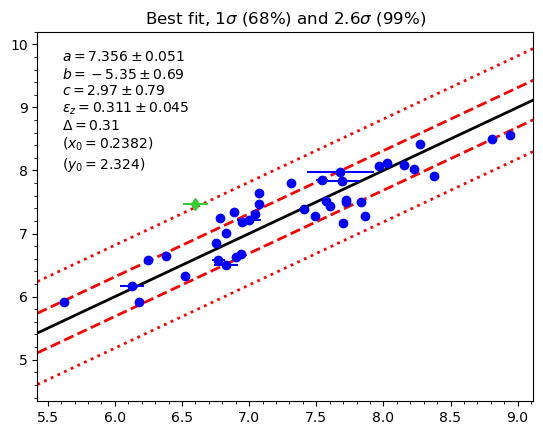

In [47]:
p = lts_planefit.lts_planefit(np.array(df_[paras]['tan_phi']), np.array(df_[paras]['log_v_max']), np.array(df_[paras]['M_BH']), errs[0]**2, errs[1]**2, errs[2]**2, clip=2.6, epsz=True,
                frac=None, pivotx=0.2382336, pivoty=2.32428246, plot=True, text=True)

sig_int:     0.0000     29.6046
Computing sig_int
sig_int:     0.0000     29.6046
sig_int:     0.4366     -0.4888
sig_int:     0.4295     -0.4719
sig_int:     0.2341      0.7455
sig_int:     0.3538     -0.2249
sig_int:     0.3008      0.0673
sig_int:     0.3130     -0.0131
sig_int:     0.3110     -0.0006
sig_int:     0.3109      0.0004
Computing sig_int error
sig_int:     0.3109      0.2328
sig_int:     0.4366     -0.2563
sig_int:     0.3707     -0.0608
sig_int:     0.3583     -0.0117
sig_int:     0.3555      0.0002
sig_int:     0.3557     -0.0006
Repeat at best fitting solution
sig_int:     0.3109      0.0004
################# Values and formal errors ################
 intercept:  7.356 +/- 0.051
    slopeX:  -5.35 +/- 0.69
    slopeY:  2.97 +/- 0.79
   scatter:  0.311 +/- 0.045
Observed rms scatter: 0.31
##########################################################
seconds 12.34


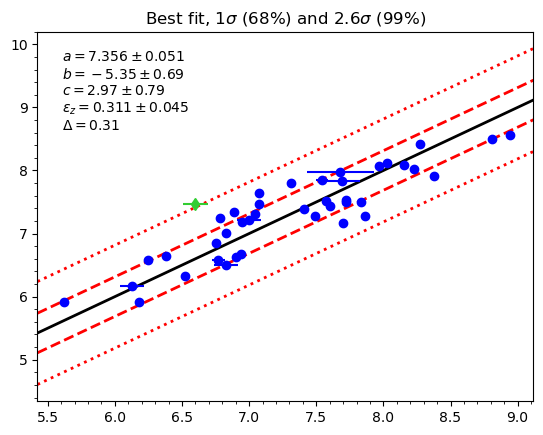

In [42]:
p2 = lts_planefit.lts_planefit(xs[0], xs[1], xs[2], errs[0]**2, errs[1]**2, errs[2]**2, clip=2.6, epsz=True,
                frac=None, plot=True, text=True)

In [40]:
p.abc

array([  7.36167817, -10.95502384,  -1.48709575])

In [41]:
p2.abc

array([  7.36167812, -10.95502342,  -1.48709515])

In [35]:
def phi_v_normalized_lts_relation(tan_phi,log_v_max,place_holder=0):
    norm_phi = 0.2382336
    norm_v = 2.32428246
    tan_phi = tan_phi - norm_phi
    log_v_max = log_v_max - norm_v
    a = -10.95502342
    b = -1.48709515
    c = 7.36167812
    return a*tan_phi+b*log_v_max+c

41


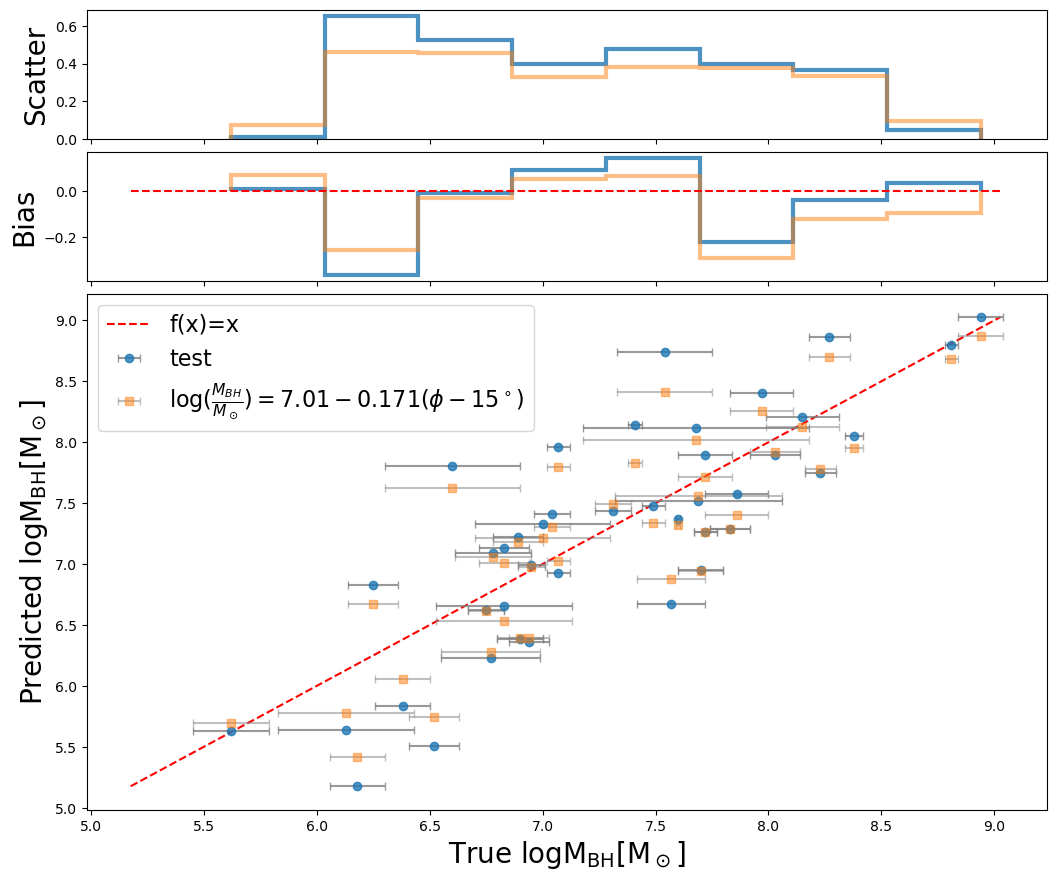

N-D relation wrmse: 0.3608491000008326
1-D relation wrmse: 0.3311469717427208


In [36]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_lts_relation,label='test',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

In [44]:
p.abc

array([ 7.35596152, -5.35249293,  2.97027275])

In [2]:
def phi_v_normalized_lts2_relation(tan_phi,log_v_max,place_holder=0):
    norm_phi = 0.2382336
    norm_v = 2.32428246
    tan_phi = tan_phi - norm_phi
    log_v_max = log_v_max - norm_v
    a = -5.35249293
    b = 2.97027275
    c = 7.35596152
    return a*tan_phi+b*log_v_max+c

41


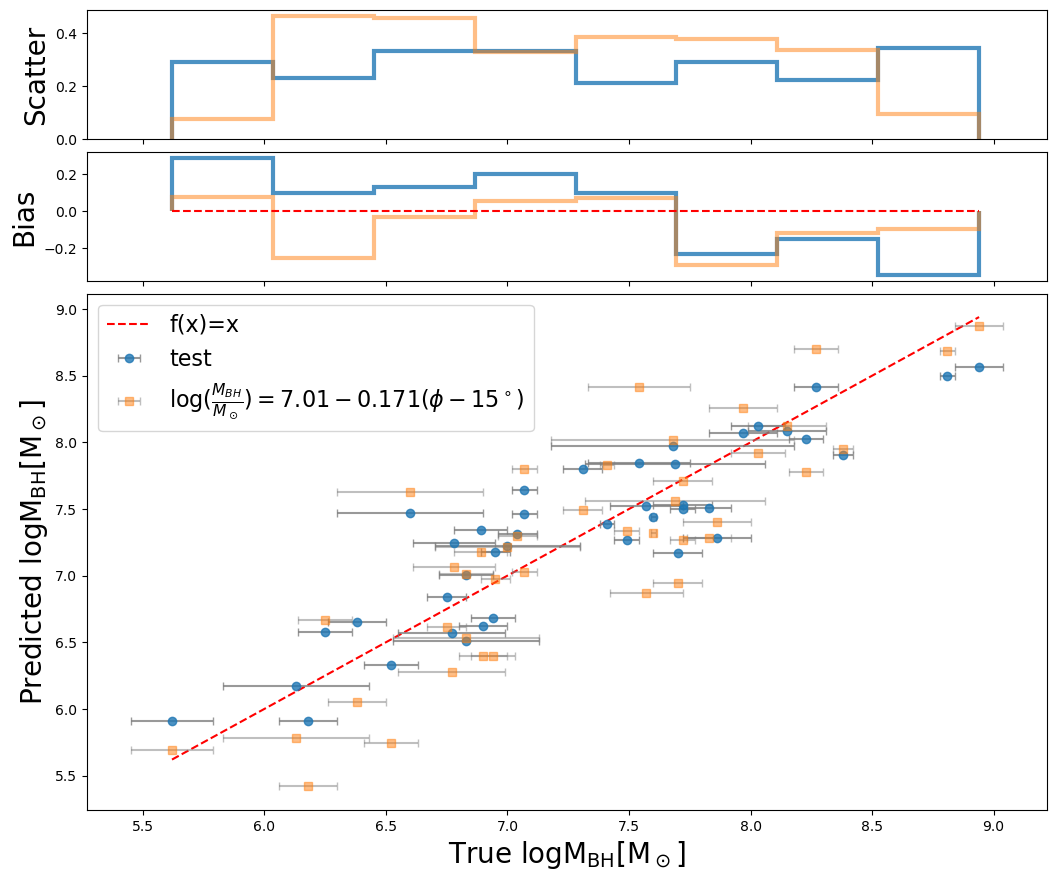

N-D relation wrmse: 0.2381592431329358
1-D relation wrmse: 0.3311469717427208


In [46]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_lts2_relation,label='test',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

## normalized

\begin{equation}
\log (\frac{\text{M}_\text{BH}}{\text{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\text{max}}{211}) + 7.33
\end{equation}

$\epsilon= 0.22035827$

$\epsilon= 0.22$

\begin{equation}
\log (\frac{\text{M}_\text{BH}}{\text{M}_\odot})= (-5.58\pm{0.056}) (\tan|\phi| - 0.24) + (3.96\pm{0.058}) \log(\frac{v_\text{max}}{211}) + (7.33\pm{0.055})
\end{equation}

$\epsilon= 0.22035827\pm0.06387363$

$\epsilon= 0.22\pm0.064$

In [3]:
def phi_v_normalized_relation(tan_phi,log_v_max,place_holder=0):
    norm_phi = 0.2382336
    norm_v = 2.32428246
    tan_phi = tan_phi - norm_phi
    log_v_max = log_v_max - norm_v
    a = -5.58189854
    b = 3.95991274
    c = 7.33367282
    return a*tan_phi+b*log_v_max+c

41


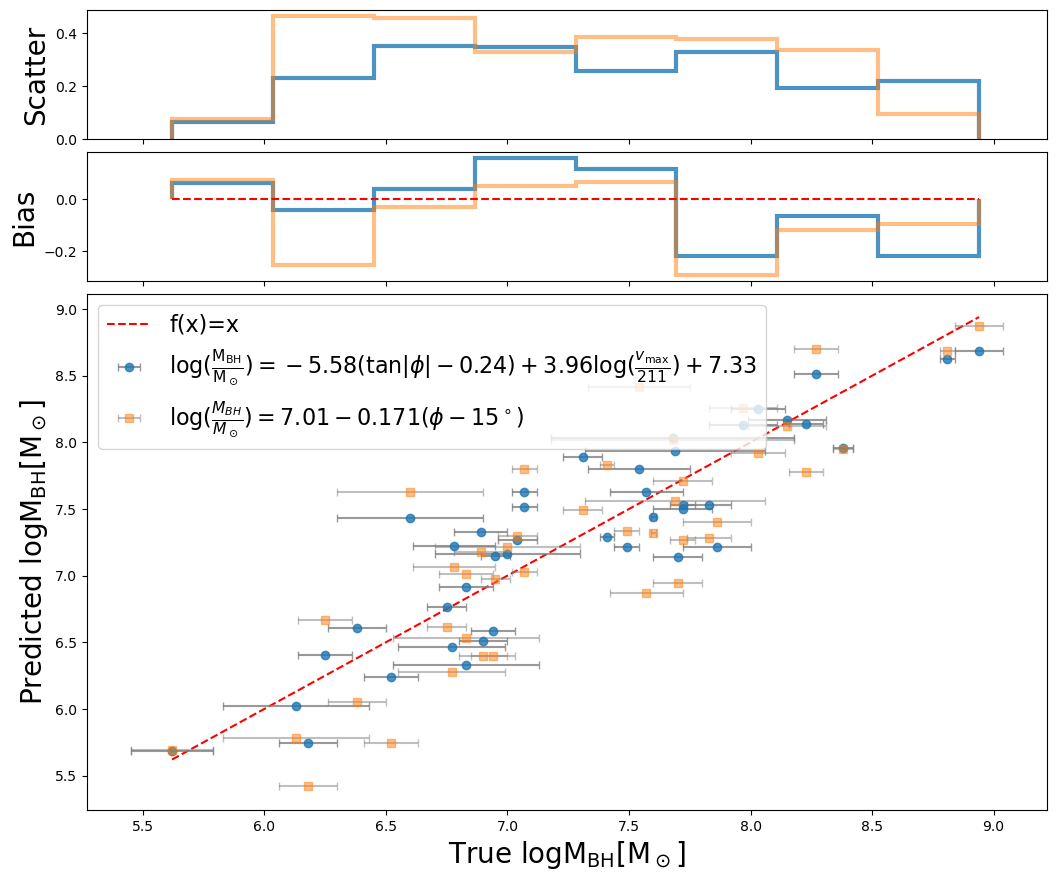

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.3311469717427208


In [97]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

41


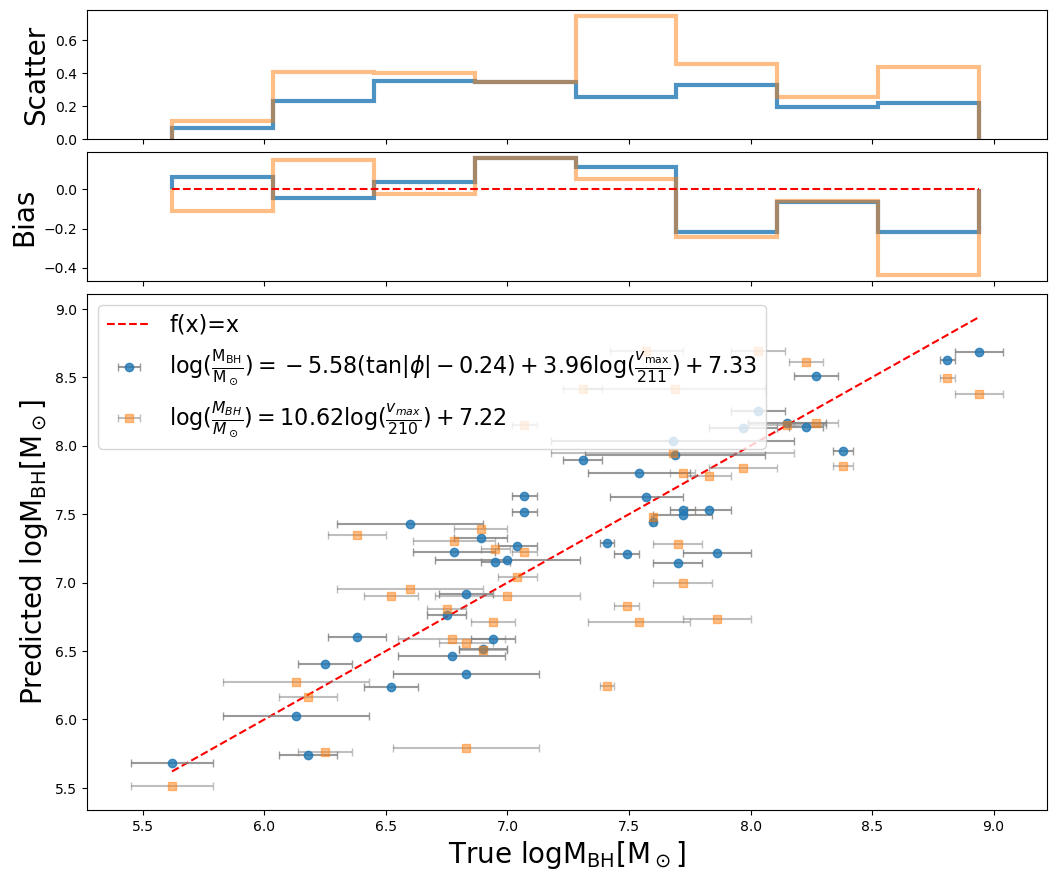

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.43826998334985934


In [252]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='log_v_max',reference_relation=old_relations.m_vmax_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 10.62 \log (\frac{v_{max}}{210})+7.22$',
                       loc='upper left')

In [3]:

FP_scatter

NameError: name 'FP_scatter' is not defined

In [32]:
def plot_3d(x,y,z,c,elev=30,azim=None,roll=None):
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)
    c=np.array(c)
    
    fs=20
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev,azim=azim,roll=roll)

    #plot = ax.scatter(x, y, z,c=c, alpha=0.4, s=10, label='fundamental plane')
    plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
    ax.plot([0.08,0.695],[1.5,2.4],[5.0,5.0],color='red',alpha=0.5,ls='--',label=r'$\mathcal{M}_\bullet=5.0$')
    FP_scatter=pd.read_csv('FP_plot_data.csv')
    ax.scatter(FP_scatter['TanPhi'],FP_scatter['LogVrot'],FP_scatter['LogBH'],alpha=0.7,label='Predicted Black Hole Mass')
    
    ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
    #ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
    ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
    #ax.set_zlabel(r'$\rm{log} [M_{BH}/M_\odot]$',fontsize=fs,labelpad=-30)
    ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
    #ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
    #fig.colorbar(plot, ax=ax)
    plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))
    plt.show()    
    return None

In [33]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
obs = df[['tan_phi','log_v_max','dc']].dropna(axis='index',how='any')
obs['tan_phi'].min(),obs['tan_phi'].max(),obs['log_v_max'].min(),obs['log_v_max'].max(),obs['dc'].min(),obs['dc'].max()

(0.071680891, 0.451517313, 2.161368002, 2.461093156, 5.352712668, 75.80506278)

In [34]:
xmin,xmax=0.05, 0.7
ymin,ymax=1.5, 2.5
#zmin,zmax=1, 80
bins=30
x=np.linspace(xmin,xmax,bins)
y=np.linspace(ymin,ymax,bins)
#z=np.linspace(zmin,zmax,bins)

In [35]:
#xx,yy,zz=np.meshgrid(x,y,z)
xx,yy=np.meshgrid(x,y)

In [36]:
#c = phi_v_dc_normalized_relation(xx,yy,zz)
#c[c<=5]=0
#c[c>5]=1
#c[(c<4.95)|(c>5.05)]=10
#c[(c>4.95)&(c<5.05)]=0
zz=phi_v_normalized_relation(xx,yy)

In [37]:
c=np.ones(zz.shape)

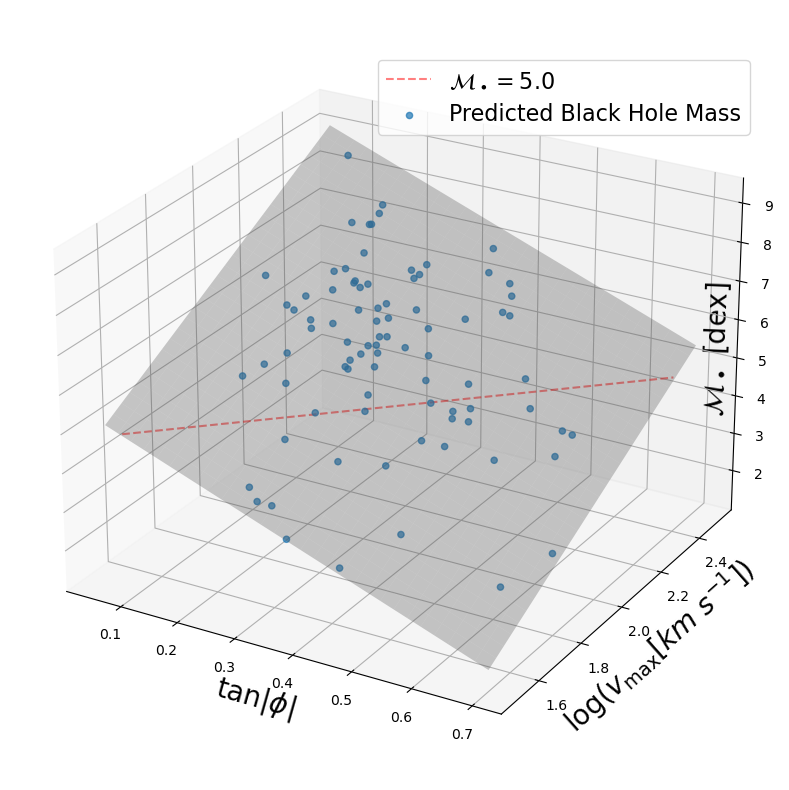

In [38]:
plot_3d(xx,yy,zz,c,elev=25)

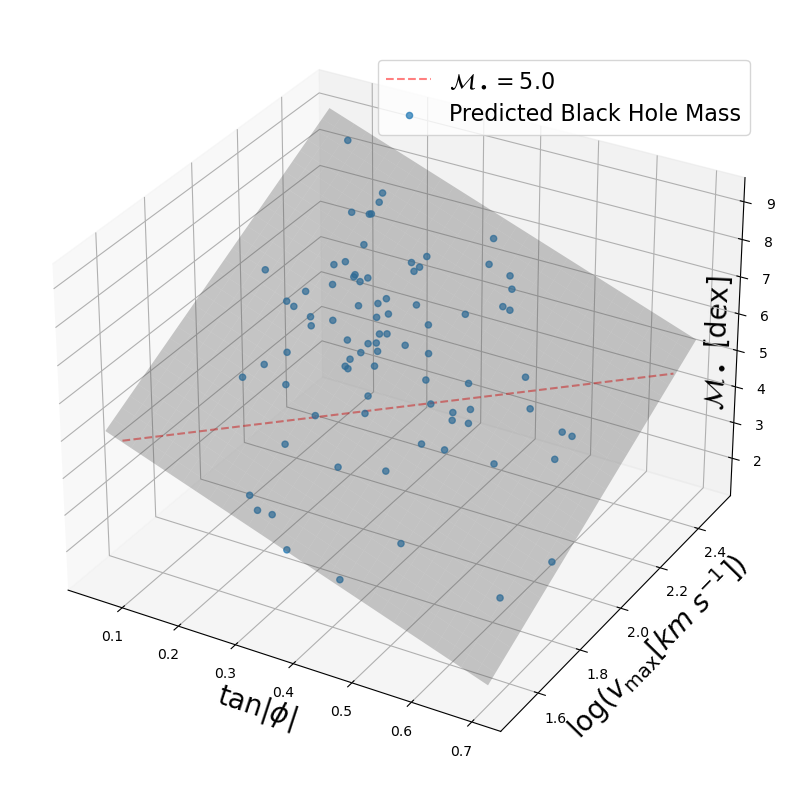

In [39]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

#plot = ax.scatter(x, y, z,c=c, alpha=0.4, s=10, label='fundamental plane')
plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.plot([0.08,0.695],[1.5,2.4],[5.0,5.0],color='red',alpha=0.5,ls='--',label=r'$\mathcal{M}_\bullet=5.0$')
FP_scatter=pd.read_csv('FP_plot_data.csv')
ax.scatter(FP_scatter['TanPhi'],FP_scatter['LogVrot'],FP_scatter['LogBH'],alpha=0.7,label='Predicted Black Hole Mass')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
#ax.set_zlabel(r'$\rm{log} [M_{BH}/M_\odot]$',fontsize=fs,labelpad=-30)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))
plt.show()    

In [40]:
from matplotlib import animation
from IPython.display import HTML

def init():
    ax.view_init(elev=10., azim=0)
    return [plot]


def animate(i):
    ax.view_init(elev=10., azim=i)
    return [plot]


# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [41]:
HTML(anim.to_html5_video())

In [42]:
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Zehao Jin'),
                                 bitrate=1800)
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/IMBH_paper/FP_pred_anim.gif', writer=writer)

In [43]:
# save as mp4, using codec h.264
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/IMBH_paper/FP_pred_anim.mp4', fps=30, codec='h264')

## Unormalized

In [9]:
def phi_v_dc_relation(tan_phi,log_v_max,dc,place_holder):    
    a = -5.450424119169053
    b = 4.
    c = 0.007093803005968875
    d = -0.80629759313596731
    return a*tan_phi+b*log_v_max+c*dc+d

41


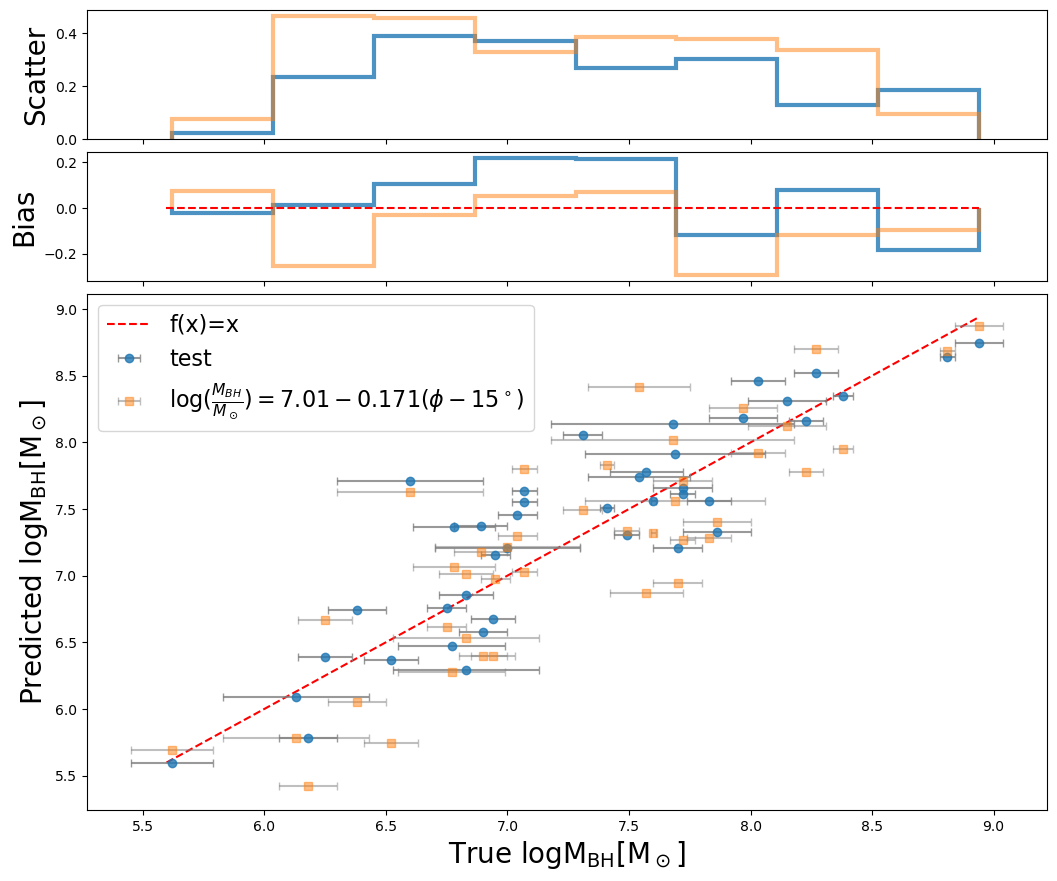

N-D relation wrmse: 0.18760303008601278
1-D relation wrmse: 0.3311469717427208


In [10]:
functions.plot_relation(['tan_phi','log_v_max','dc','bri25'],phi_v_dc_relation,label='test',
                       reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$')